<a href="https://colab.research.google.com/github/AyushiRwt20/BREAST_CANCER_PREDICTION/blob/main/Ayushi_breast_cancer_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Prediction

# Importing  python librarires

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time


# Importing data from drive

In [ ]:
import pandas as pd
from google.colab import drive
print("importing csv file from drive")
drive.mount('/content/drive')
path="/content/drive/MyDrive/Breast_cancer_data.csv"
df=pd.read_csv(path)
ch=input("want to display the dataframe?( Y/N):")
if ch=="Y" or ch=="y":
  print(df.head(4))
else:
  print("OK continuing the programme.")
print("-*-"*20)


importing csv file from drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
want to display the dataframe?( Y/N):n
OK continuing the programme.
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


# Data Analysis

(569, 6)
counting  non-null values..
total non-null values in columns:- 0      6
1      6
2      6
3      6
4      6
      ..
564    6
565    6
566    6
567    6
568    6
Length: 569, dtype: int64
['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness', 'diagnosis']


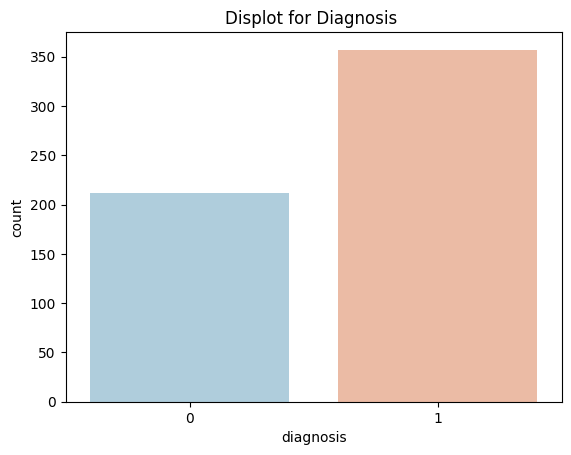

In [ ]:
print(df.shape)

df.describe()
df.isnull().sum()
print("counting  non-null values..")
print("total non-null values in columns:-",df.count(1))
cols = list(df.columns)
print(cols)
sns.countplot(x='diagnosis', data=df, palette='RdBu_r')
plt.title('Displot for Diagnosis ')
plt.show()

# Data Visualization and Pre Processing

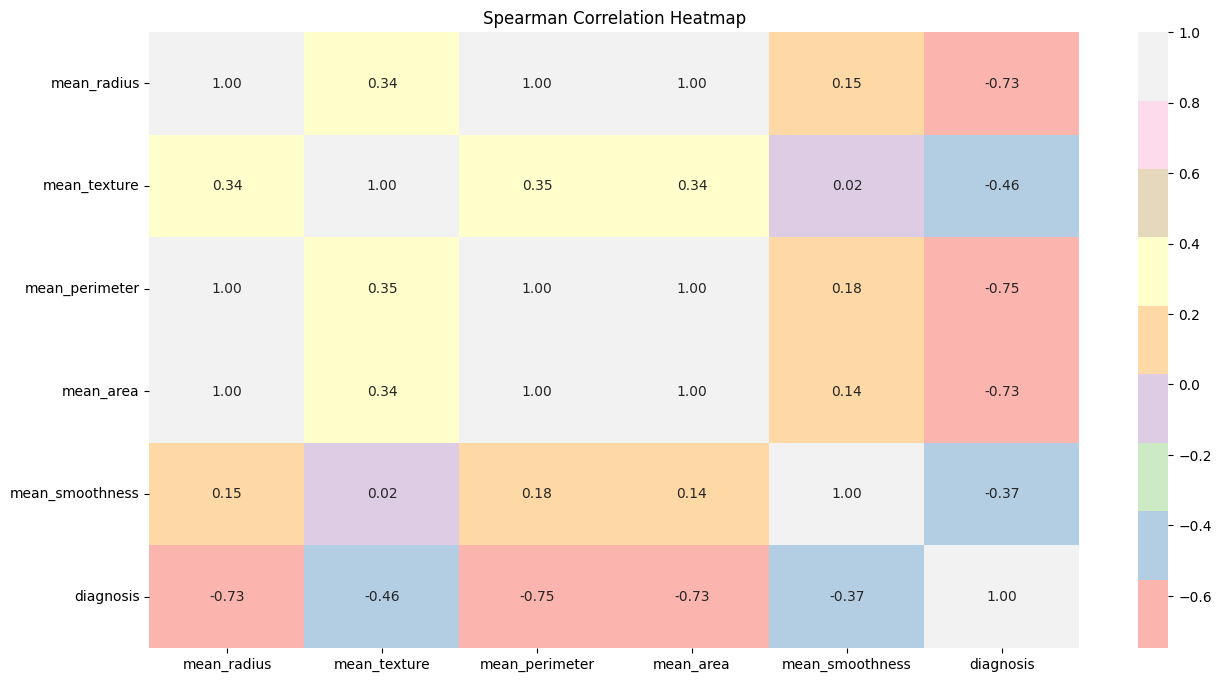

In [ ]:
#heatmap for all the parameters of diagnosis
corr = df.corr(method = 'spearman')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Pastel1')
plt.title('Spearman Correlation Heatmap')
plt.show()

<Figure size 1000x1000 with 0 Axes>

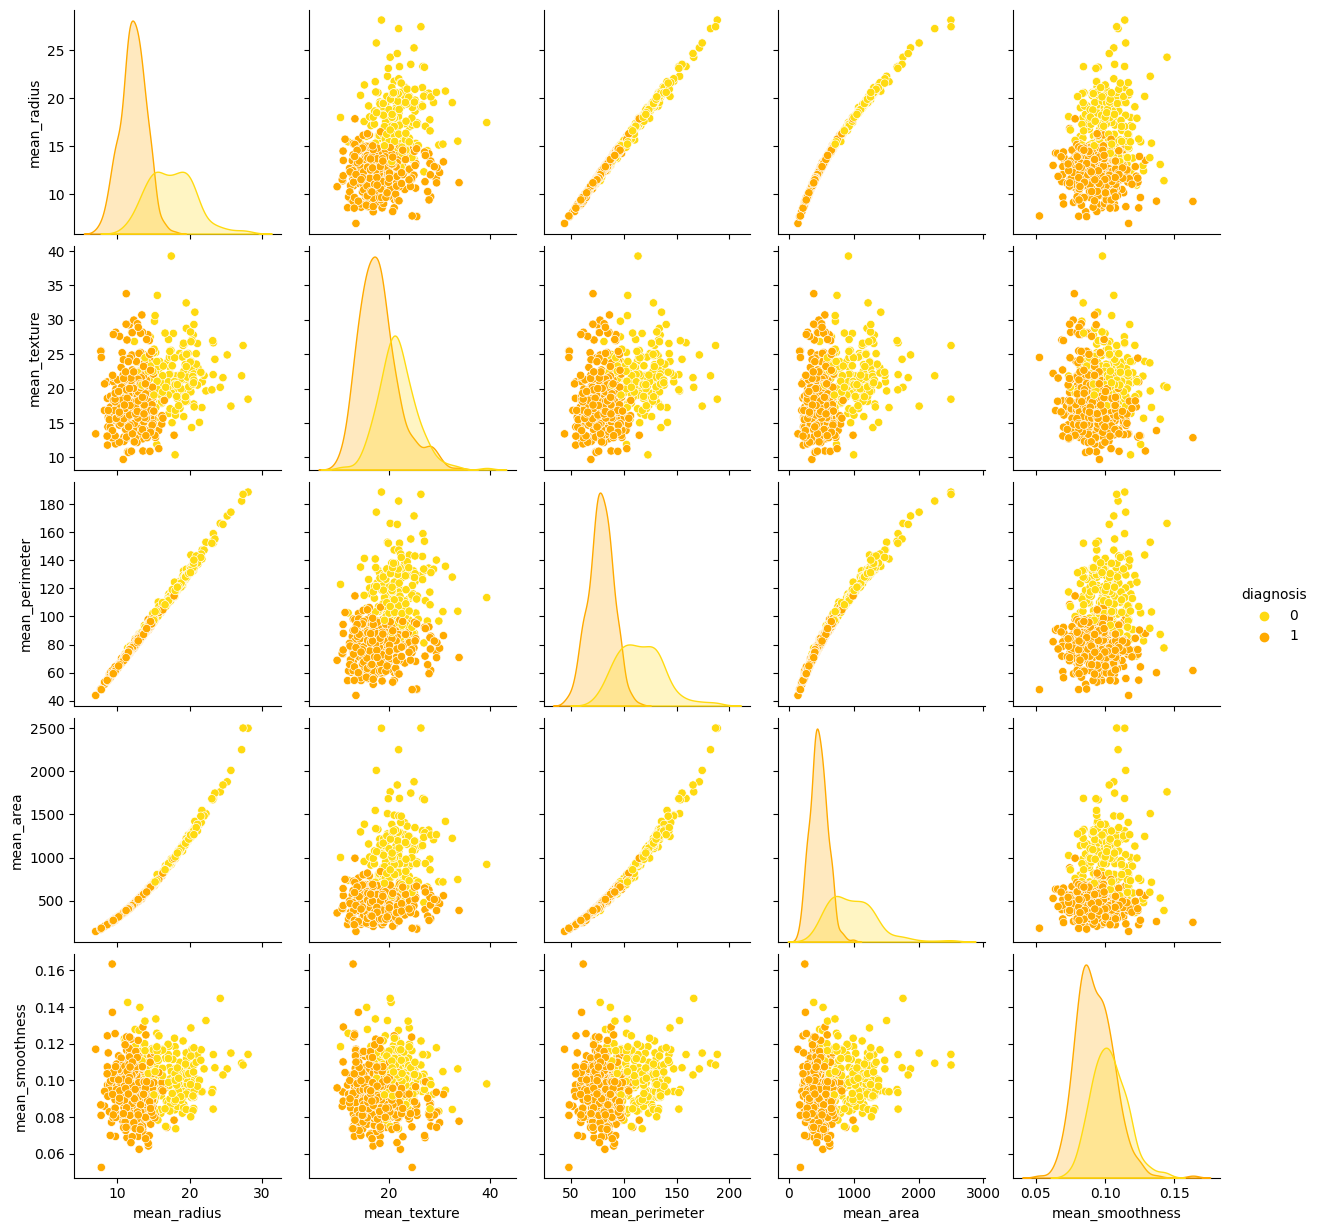

In [ ]:
figure = plt.figure(figsize=(10,10))   # plotting for all the parameters
sns.pairplot(df, hue='diagnosis', palette='Wistia')
plt.show()

<ipython-input-6-c59bd1a39341>:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=axes[i][0], x='diagnosis', y=col, data=df, palette='autumn_r', jitter=True)
<ipython-input-6-c59bd1a39341>:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=axes[i][0], x='diagnosis', y=col, data=df, palette='autumn_r', jitter=True)
<ipython-input-6-c59bd1a39341>:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=axes[i][0], x='diagnosis', y=col, data=df, palette='autumn_r', jitter=True)
<ipython-input-6-c59bd1a39341>:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=axes[i][0], x='diagnosis', y=col, data=df, palette='autumn_r', jitter=True)
<ipython-input-6-c59bd1a39341>:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(ax=axes[i][0], x='diagnosis', y=col, data=df, palette='autumn_r', jitter=T

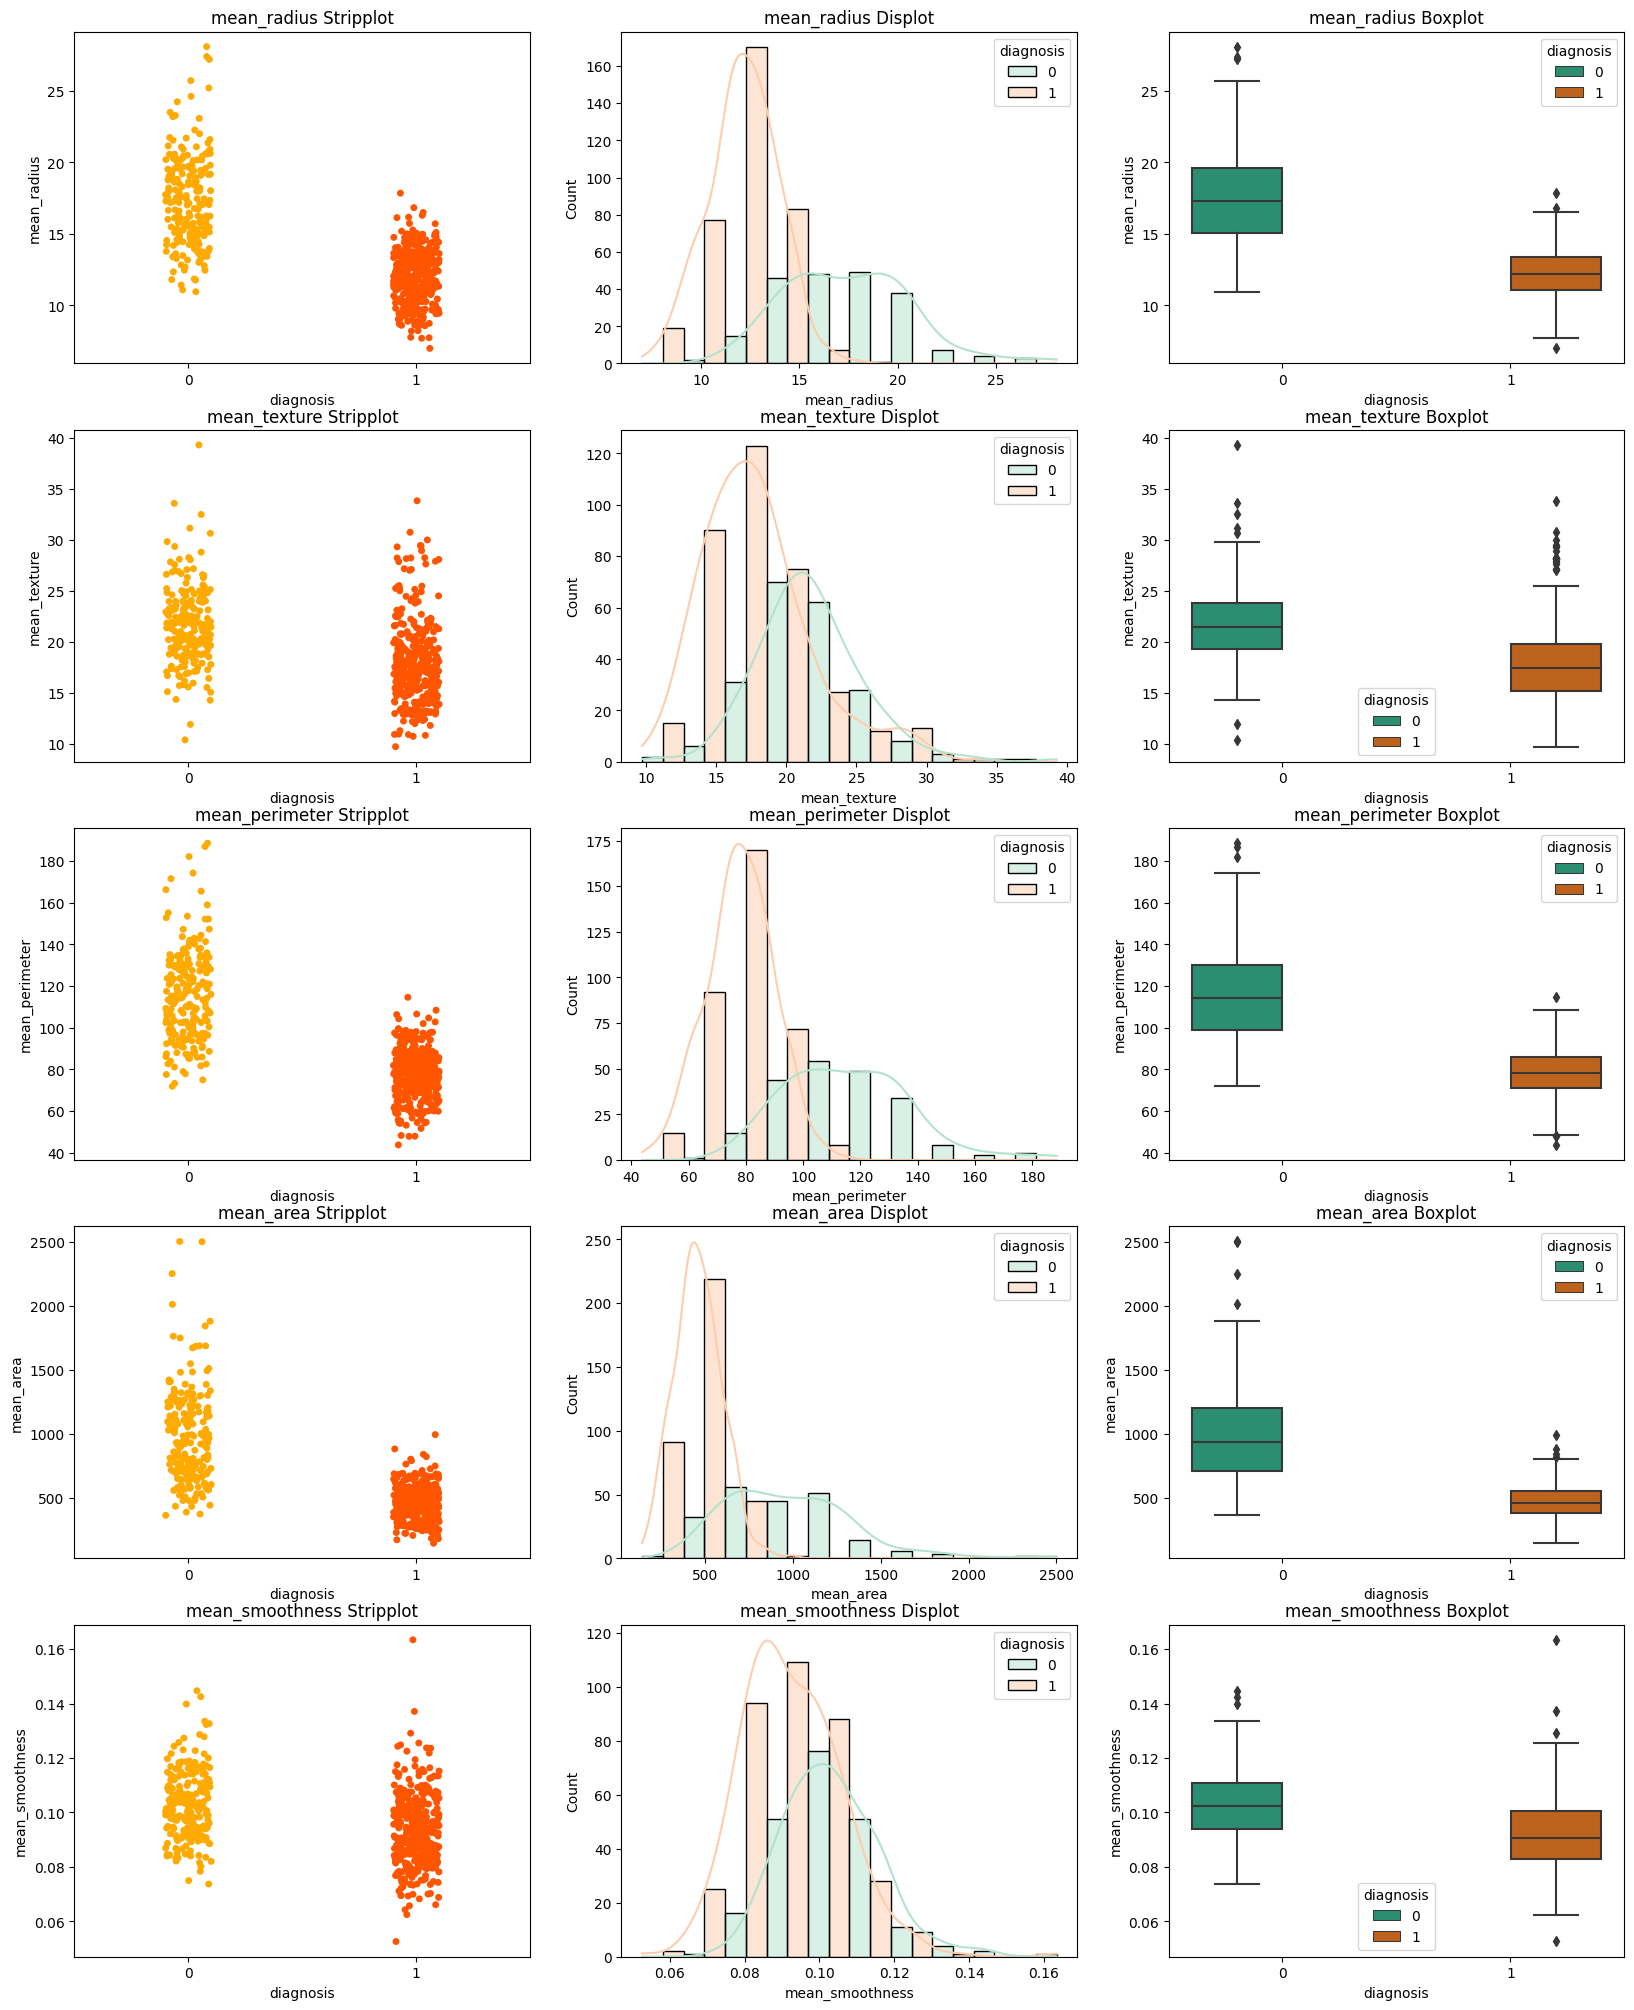

In [ ]:
fig, axes = plt.subplots(5, 3, figsize=(20,25))
for i, col in zip(range(5), cols):
    sns.stripplot(ax=axes[i][0], x='diagnosis', y=col, data=df, palette='autumn_r', jitter=True)
    axes[i][0].set_title(f'{col} Stripplot')
    sns.histplot(ax=axes[i][1], x=col, data=df, kde=True, bins=10, palette='Pastel2', hue='diagnosis', multiple='dodge')
    axes[i][1].set_title(f'{col} Displot')
    sns.boxplot(ax=axes[i][2], x='diagnosis', y=col, data=df, palette='Dark2', hue='diagnosis')
    axes[i][2].set_title(f'{col} Boxplot')

In [ ]:
def outlier_limits(df, col_name, q1 = 0.25, q3 = 0.75):
    quartile1 = df[col_name].quantile(q1)
    quartile3 = df[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_limits(df, variable, q1 = 0.25, q3 = 0.75):
    low_limit, up_limit = outlier_limits(df, variable, q1 = q1, q3 = q3)
    df.loc[(df[variable] < low_limit), variable] = low_limit
    df.loc[(df[variable] > up_limit), variable] = up_limit

for variable in cols:
    replace_with_limits(df, variable)

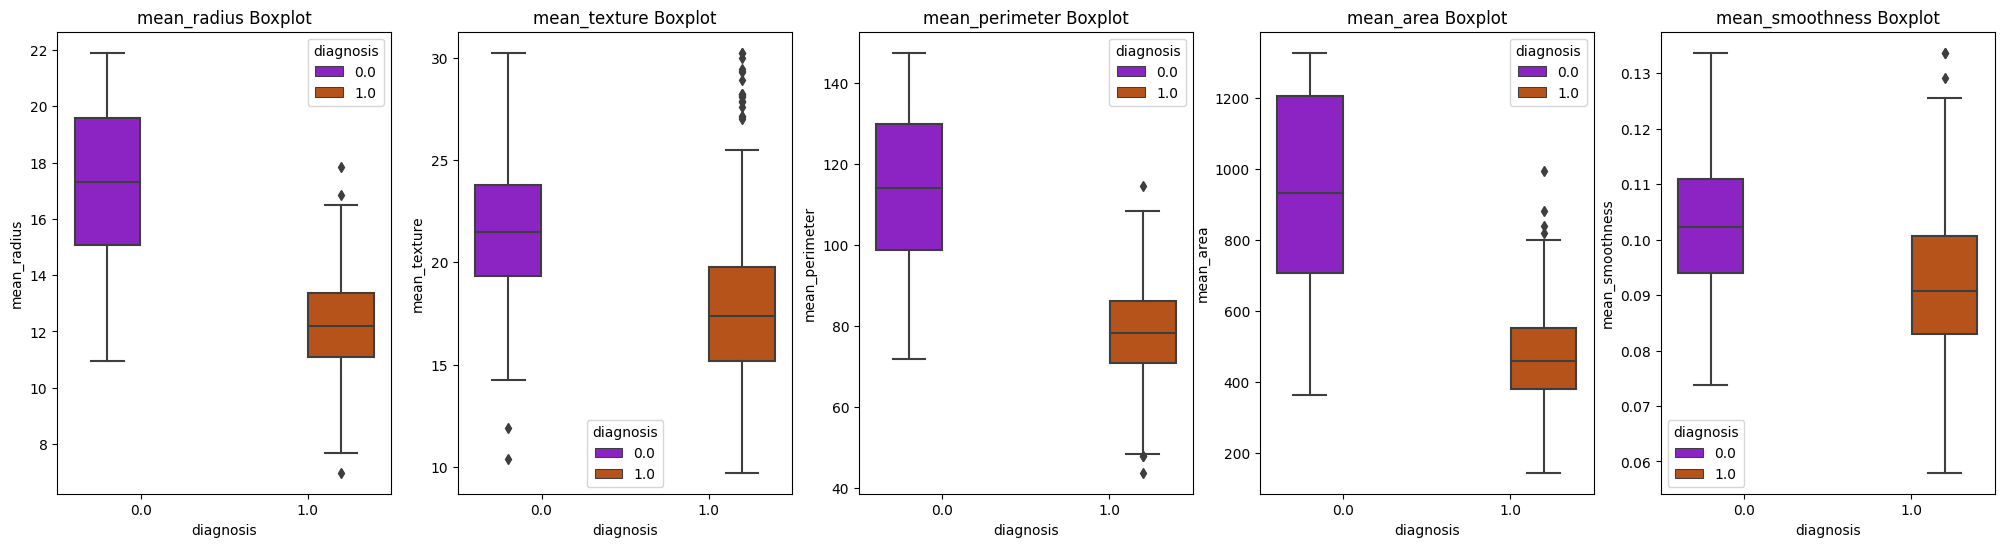

In [ ]:
# showing box plot for all the parameters
fig, axes = plt.subplots(1, 5, figsize=(25,6))
for i, col in zip(range(5), cols):
    sns.boxplot(ax=axes[i], x='diagnosis', y=col, data=df, palette='gnuplot', hue='diagnosis')
    axes[i].set_title(f'{col} Boxplot')


**PREPROCESSING**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=cols)
df_scaled.head(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,0.737918,0.032627,0.761873,0.724975,0.798006,0.0
1,0.910852,0.392501,0.859264,0.999746,0.353473,0.0
2,0.851867,0.561967,0.831300,0.895756,0.681788,0.0
3,0.297540,0.519601,0.325828,0.205107,1.000000,0.0
4,0.892084,0.225469,0.880478,0.975228,0.558967,0.0
5,0.366580,0.291697,0.373945,0.282043,0.922147,0.0
6,0.755346,0.500122,0.731016,0.757947,0.484086,0.0
7,0.451036,0.541514,0.447519,0.367264,0.804609,0.0
8,0.403445,0.589725,0.421484,0.318143,0.915544,0.0
9,0.367250,0.697833,0.387445,0.281028,0.800647,0.0


In [ ]:
X= df_scaled.iloc[:,3:4]
y = df_scaled['diagnosis']
X.head(10)

,mean_area
0,0.724975
1,0.999746
2,0.895756
3,0.205107
4,0.975228
5,0.282043
6,0.757947
7,0.367264
8,0.318143
9,0.281028


In [ ]:
#training and testing the data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'f1':'f1'}

In [ ]:
def fit(clf, params, cv=10, X_train=X_train, y_train=y_train):
    grid = GridSearchCV(clf, params, cv=KFold(n_splits=cv), n_jobs=1, verbose=1, return_train_score=True, scoring=scoring, refit='f1')
    grid.fit(X_train, y_train)
    return grid

def make_predictions(model, X_test=X_test):
    return model.predict(X_test)

def best_scores(model):
  best_mean_f1 = max(list(model.cv_results_['mean_test_f1']))
  mean_f1_index = list(model.cv_results_['mean_test_f1']).index(best_mean_f1)
  print(f'The best parameters are: {model.best_params_}')
  print('Mean Test Cross Validation Scores for different metrics: (corresponding to best mean f1)')
  print('The best score that we get is (Accuracy): ' + str(model.cv_results_['mean_test_accuracy'][mean_f1_index]))
  print('The best score that we get is (Precision): ' + str(model.cv_results_['mean_test_precision'][mean_f1_index]))
  print(f'The best score that we get is (F1 Score): {best_mean_f1}')
  return None
def plot_confusion_matrix(y_pred):
    print('00: True Negatives\n01: False Positives\n10: False Negatives\n11: True Positives\n')
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.matshow(conf_matrix, cmap='GnBu', alpha=0.75)
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='large')
    plt.xlabel('Predictions', fontsize=20)
    plt.ylabel('Actuals', fontsize=20)
    plt.title('Confusion Matrix', fontsize=20)
    plt.show()
    return None
def check_scores(y_pred):
    print('Precision: %.3f' % precision_score(y_test, y_pred))
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
    print('F1 Score: %.3f' % f1_score(y_test, y_pred))
    return None

In [ ]:
import warnings
warnings.filterwarnings('always')

**LOGISTIC REGRESSION MODEL**

In [ ]:
lr_params = {'C':[0.001,.009,0.01,.09,1,5,10,25], 'penalty':['l1', 'l2']} #lasso and ridge regression
lr_clf = LogisticRegression(solver='saga', max_iter=5000)
lr_model = fit(lr_clf, lr_params)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fitting 10 folds for each of 16 candidates, totalling 160 fits


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
best_scores(lr_model)

The best parameters are: {'C': 5, 'penalty': 'l2'}
Mean Test Cross Validation Scores for different metrics: (corresponding to best mean f1)
The best score that we get is (Accuracy): 0.8898671096345515
The best score that we get is (Precision): 0.8736434484401506
The best score that we get is (F1 Score): 0.91612821888844


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
lr_y_pred = make_predictions(lr_model)
check_scores(lr_y_pred)

Precision: 0.879
Accuracy: 0.895
F1 Score: 0.921


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


**PLOTTING OF CONFUSION MATRIX FOR LINEAR REGRESSION MODEL**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


00: True Negatives
01: False Positives
10: False Negatives
11: True Positives



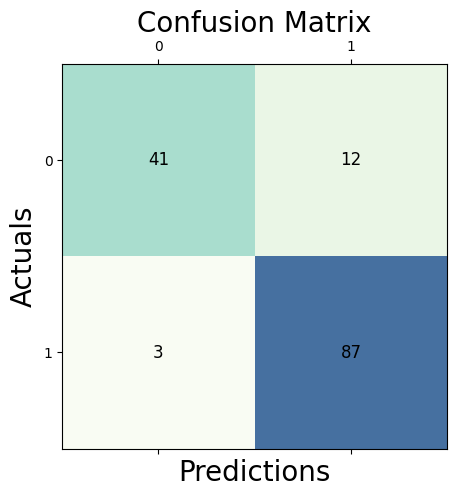

In [ ]:
plot_confusion_matrix(lr_y_pred)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


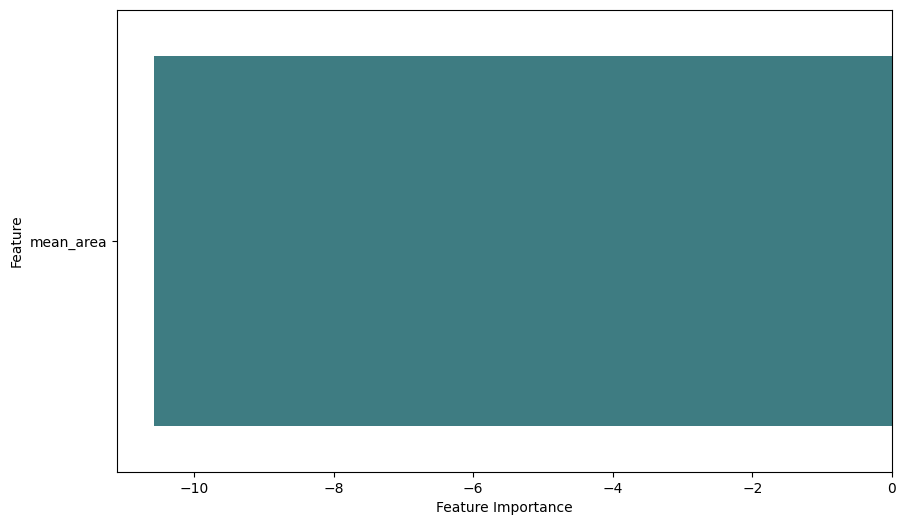

In [ ]:
lr_feature_scores = lr_model.best_estimator_.coef_[0].tolist()
lr_fi = pd.DataFrame({'Feature': X.columns , 'Feature Importance': lr_feature_scores})
plt.figure(figsize=(10,6))
sns.barplot(x='Feature Importance', y='Feature', data=lr_fi, palette='crest', )
plt.show()

**LINEAR DISCRIMINANT ANALYSIS (LDA)**

In [ ]:
lda_params = {'solver': ['svd', 'eigen']}
lda_clf =LDA()
lda_model = fit(lda_clf, lda_params)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 10 folds for each of 2 candidates, totalling 20 fits


In [ ]:
best_scores(lda_model)

The best parameters are: {'solver': 'svd'}
Mean Test Cross Validation Scores for different metrics: (corresponding to best mean f1)
The best score that we get is (Accuracy): 0.8616279069767442
The best score that we get is (Precision): 0.8259917468942612
The best score that we get is (F1 Score): 0.8987561239001645


In [ ]:
lda_y_pred = make_predictions(lda_model)
check_scores(lda_y_pred)

Precision: 0.837
Accuracy: 0.860
F1 Score: 0.897


**Plotting of confusion matrix for LDA**

00: True Negatives
01: False Positives
10: False Negatives
11: True Positives



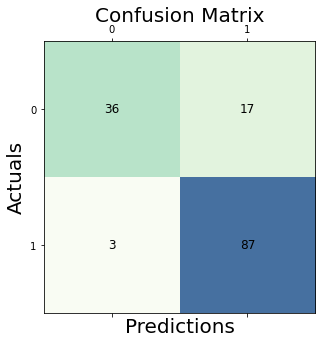

In [ ]:
plot_confusion_matrix(lda_y_pred)

**SUPPORT VECTOR MACHINE (SVM)**

In [ ]:
svm_params = {'C':[1,10,100,1000], 'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
svm_clf = SVC()
svm_model = fit(svm_clf, svm_params)

Fitting 10 folds for each of 32 candidates, totalling 320 fits


In [ ]:
best_scores(svm_model)

The best parameters are: {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
Mean Test Cross Validation Scores for different metrics: (corresponding to best mean f1)
The best score that we get is (Accuracy): 0.8898117386489479
The best score that we get is (Precision): 0.8685641937126757
The best score that we get is (F1 Score): 0.9165384642563893


In [ ]:
svm_y_pred = make_predictions(svm_model)
check_scores(svm_y_pred)

Precision: 0.879
Accuracy: 0.895
F1 Score: 0.921


**Plotting Confusion Matrix For SVM**

00: True Negatives
01: False Positives
10: False Negatives
11: True Positives



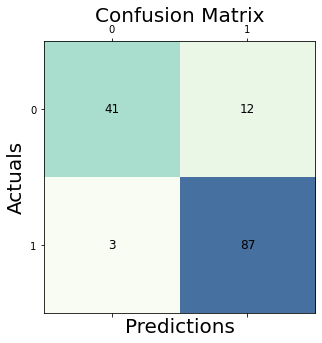

In [ ]:
plot_confusion_matrix(svm_y_pred)

**K- NEAREST NEIGHBOURS (KNNs)**

In [ ]:
knns_params = {'n_neighbors': list(range(1, 31)), 'weights': ['uniform', 'distance'],
               'metric': ['euclidean', 'manhattan']}
knns_clf = KNeighborsClassifier()
knns_model = fit(knns_clf, knns_params)

In [ ]:
best_scores(knns_model)

The best parameters are: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Mean Test Cross Validation Scores for different metrics: (corresponding to best mean f1)
The best score that we get is (Accuracy): 0.8875415282392026
The best score that we get is (Precision): 0.8710224806982152
The best score that we get is (F1 Score): 0.9146086396949858


In [ ]:
knns_y_pred = make_predictions(knns_model)
check_scores(knns_y_pred)

Precision: 0.879
Accuracy: 0.895
F1 Score: 0.921


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:498: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  counts = np.zeros(a_view.shape[:-1], dtype=np.int)


00: True Negatives
01: False Positives
10: False Negatives
11: True Positives



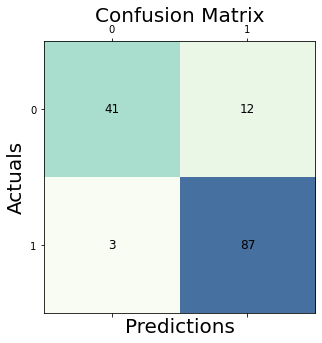

In [ ]:
plot_confusion_matrix(knns_y_pred)

#CONCLUSION

*   Three classification models,LDA, SVM and KNNs were used to clasify the data.
*   Hypertuning was done to get the best result
* Variables were scaled for KNN, SVM and LDA models.
*  Each model provides high accuracy with Linear Discriminative Analysis being the lowest with 86% and all the other model provide an accuracy of 88%.












# SELECTION OF KNNs MODEL

*  K-nearest neighbors is a non-parametric method used for classification and regression. It is one of the most easy ML technique used. It is a lazy learning model, with local approximation.

* Basic Theory :
The basic logic behind KNN is to explore your neighborhood, assume the test datapoint to be similar to them and derive the output. In KNN, we look for k neighbors and come up with the prediction.


*   Advantages :
Easy and simple machine learning model.
Few hyperparameters to tune.
*    KNN is better than SVM. SVM outperforms KNN when there are large features and lesser training data.


*  KNN is a completely non-parametric approach: no assumptions are made about the shape of the decision boundary.
Therefore, we can expect KNN to dominate LDA and logistic regression when the decision boundary is highly non-linear.






